# <font color='red'> Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Grding rubric
|Description | Points|
|---|---|
|Data preprocessing | 5 points|
|Regression with cross-validation| 7 points|
|Classification with cross validation | 8 points|
|Total | 20 points|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

# Regression

In [2]:
life_data = pd.read_csv('Life Expectancy Data.csv')
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life_data.isna().sum()

Country                               0
Year                                  0
Status                             1040
Life expectancy                      10
Adult Mortality                      10
infant deaths                         0
Alcohol                             194
percentage expenditure                0
Hepatitis B                         553
Measles                               0
 BMI                                 34
under-five deaths                     0
Polio                                19
Total expenditure                   226
Diphtheria                           19
 HIV/AIDS                             0
GDP                                 448
Population                          652
 thinness  1-19 years                34
 thinness 5-9 years                  34
Income composition of resources     167
Schooling                           163
dtype: int64

In [4]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             1898 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# Imputing Missing Values

In [5]:
for column in ['Status']:
    life_data[column].fillna(life_data[column].mode()[0],inplace=True)

In [6]:
for column in ['Life expectancy ']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [7]:
for column in ['Adult Mortality']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [8]:
for column in ['Alcohol']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [9]:
for column in ['Hepatitis B']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [10]:
for column in [' BMI ']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [11]:
for column in ['Polio']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [12]:
for column in ['Total expenditure']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [13]:
for column in ['Diphtheria ']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [14]:
for column in ['GDP']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [15]:
for column in ['Population']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [16]:
for column in [' thinness  1-19 years']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [17]:
for column in [' thinness 5-9 years']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [18]:
for column in ['Income composition of resources']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [19]:
for column in ['Schooling']:
    life_data[column].fillna(life_data.groupby('Country')[column].mean()[0],inplace=True)

In [20]:
life_data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Encoding

In [21]:
cat_encoder = LabelEncoder()
life_data.iloc[:,0] = cat_encoder.fit_transform(life_data.iloc[:,0])

In [22]:
cat_encoder = LabelEncoder()
life_data.iloc[:,2] = cat_encoder.fit_transform(life_data.iloc[:,2])

In [23]:
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
# Renaming some column names as they contain trailing spaces.
life_data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

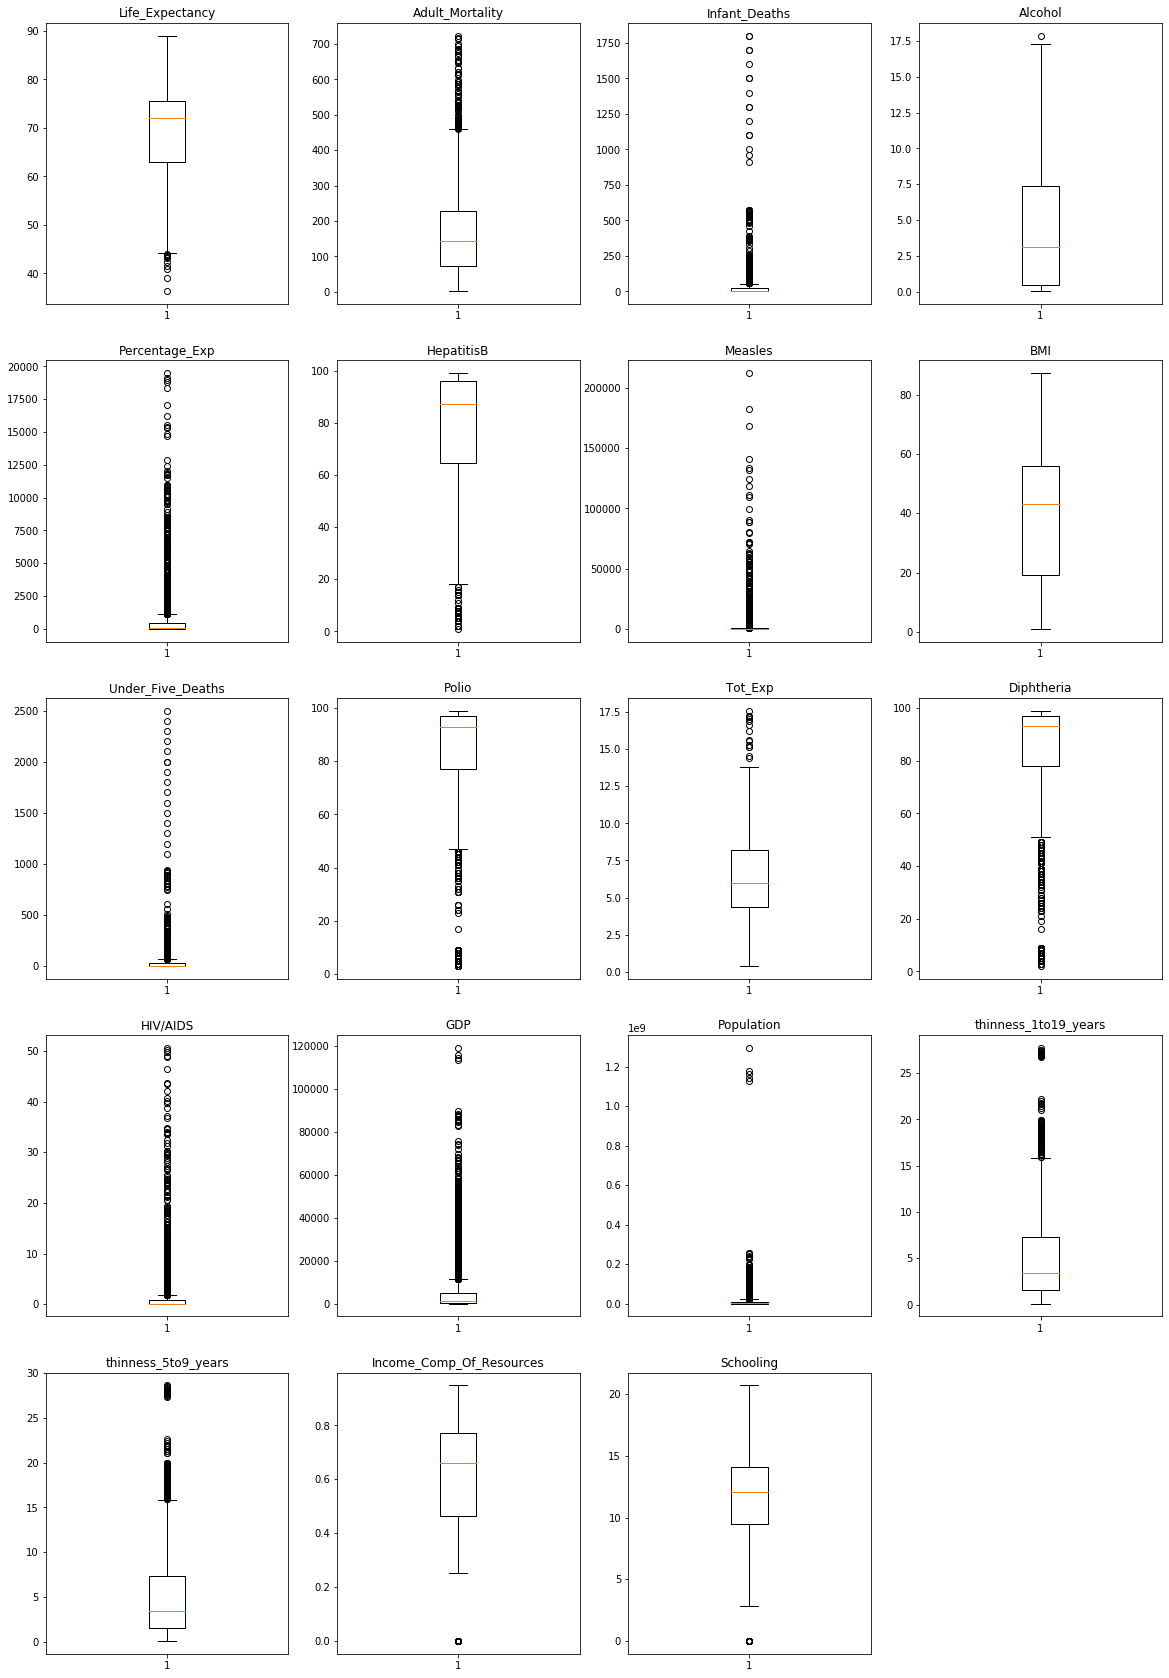

In [25]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

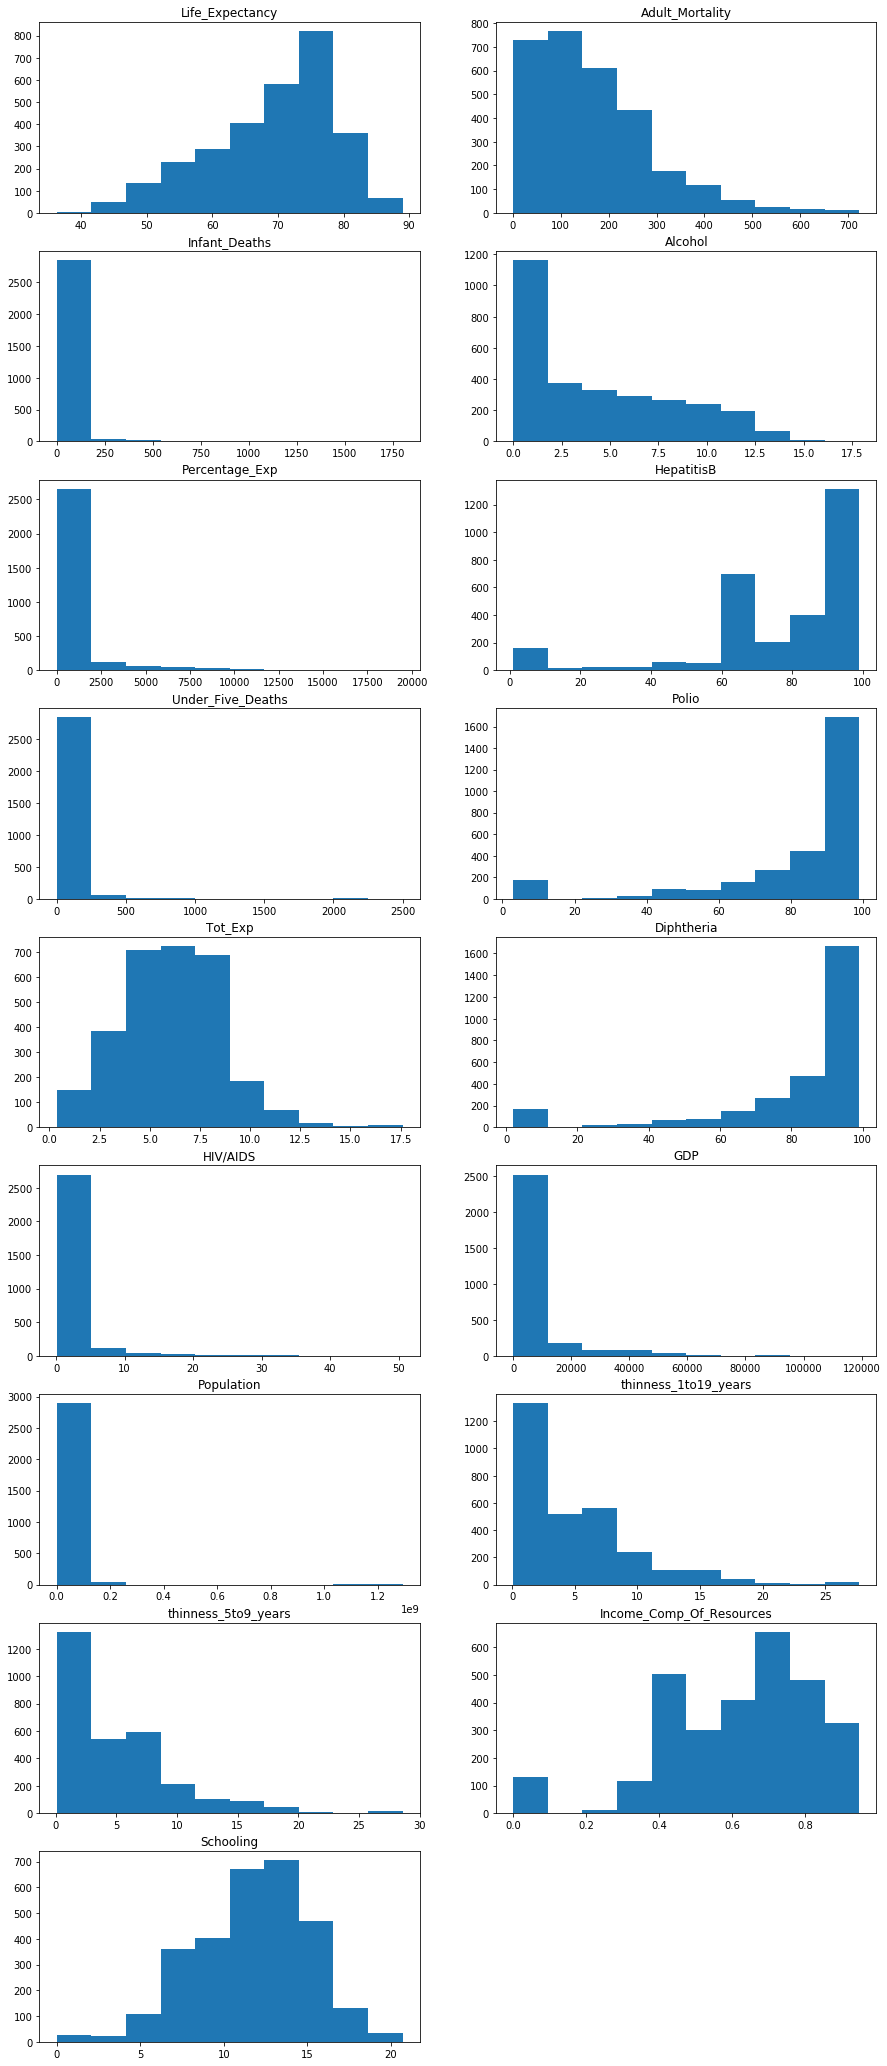

In [26]:
# Distribution of each numerical variable.
all_col = ['Life_Expectancy','Adult_Mortality','Infant_Deaths',
         'Alcohol','Percentage_Exp','HepatitisB',
         'Under_Five_Deaths','Polio','Tot_Exp',
         'Diphtheria','HIV/AIDS','GDP',
         'Population','thinness_1to19_years','thinness_5to9_years',
         'Income_Comp_Of_Resources',
         'Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(life_data[all_col[i]])
    plt.title(all_col[i])

plt.show()

    

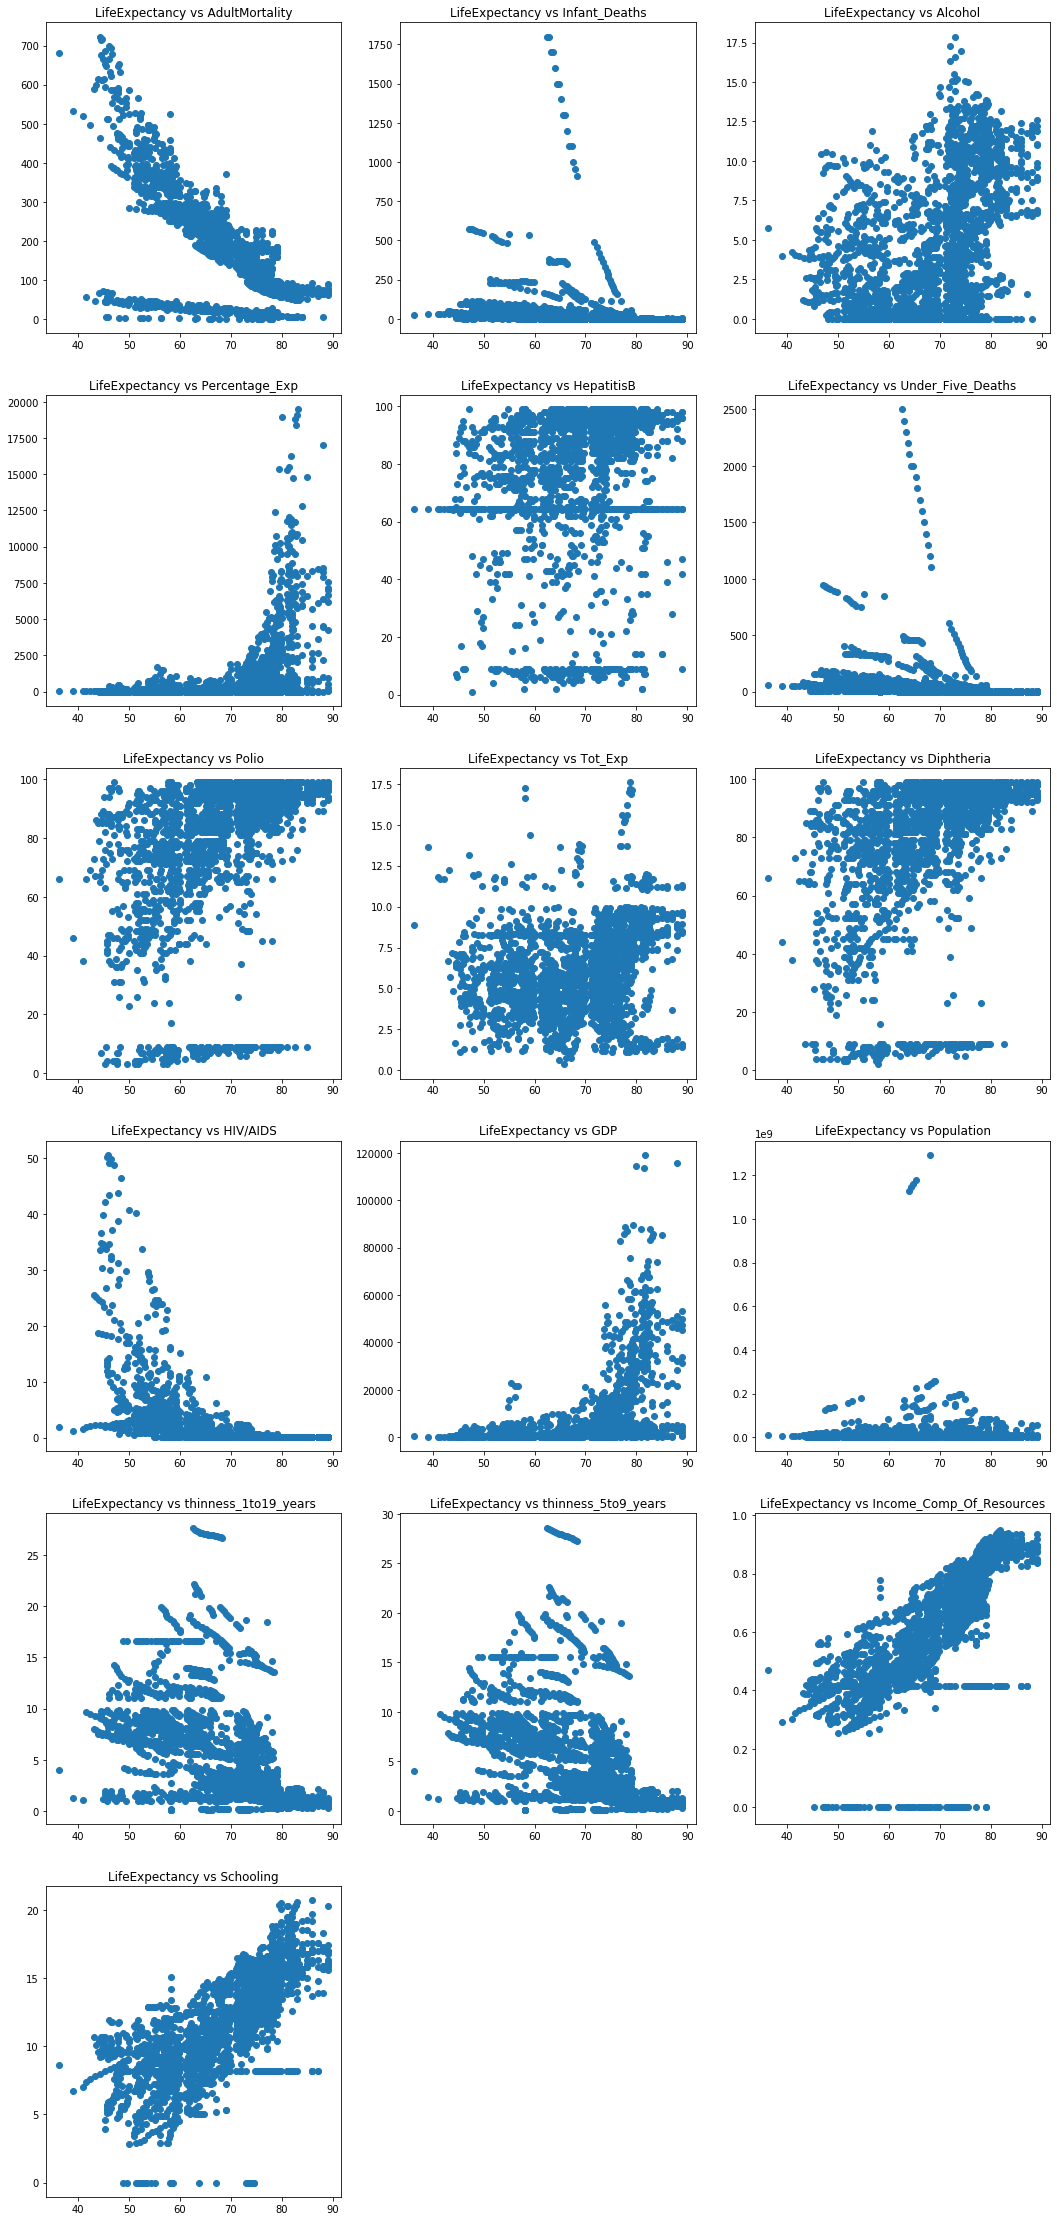

In [27]:
# Scatter plot between the target variable (Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(life_data["Life_Expectancy"], life_data["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(life_data["Life_Expectancy"], life_data["Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(life_data["Life_Expectancy"], life_data["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(life_data["Life_Expectancy"], life_data["Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(life_data["Life_Expectancy"], life_data["HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(life_data["Life_Expectancy"], life_data["Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(life_data["Life_Expectancy"], life_data["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(life_data["Life_Expectancy"], life_data["Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(life_data["Life_Expectancy"], life_data["Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(life_data["Life_Expectancy"], life_data["HIV/AIDS"])
plt.title("LifeExpectancy vs HIV/AIDS")

plt.subplot(6,3,11)
plt.scatter(life_data["Life_Expectancy"], life_data["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(life_data["Life_Expectancy"], life_data["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(life_data["Life_Expectancy"], life_data["thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(life_data["Life_Expectancy"], life_data["thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(life_data["Life_Expectancy"], life_data["Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(life_data["Life_Expectancy"], life_data["Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

Life_Expectancy has kind of Negative relationship with AdultMortality, HIV/AIDS.

Life_Expectancy has somewhat positive relationship with Percentage_Exp, GDP, Income_Comp_Of_Resources and Schooling.

Let us check for any correlation among the variables that are related to the target Life_Expectancy.

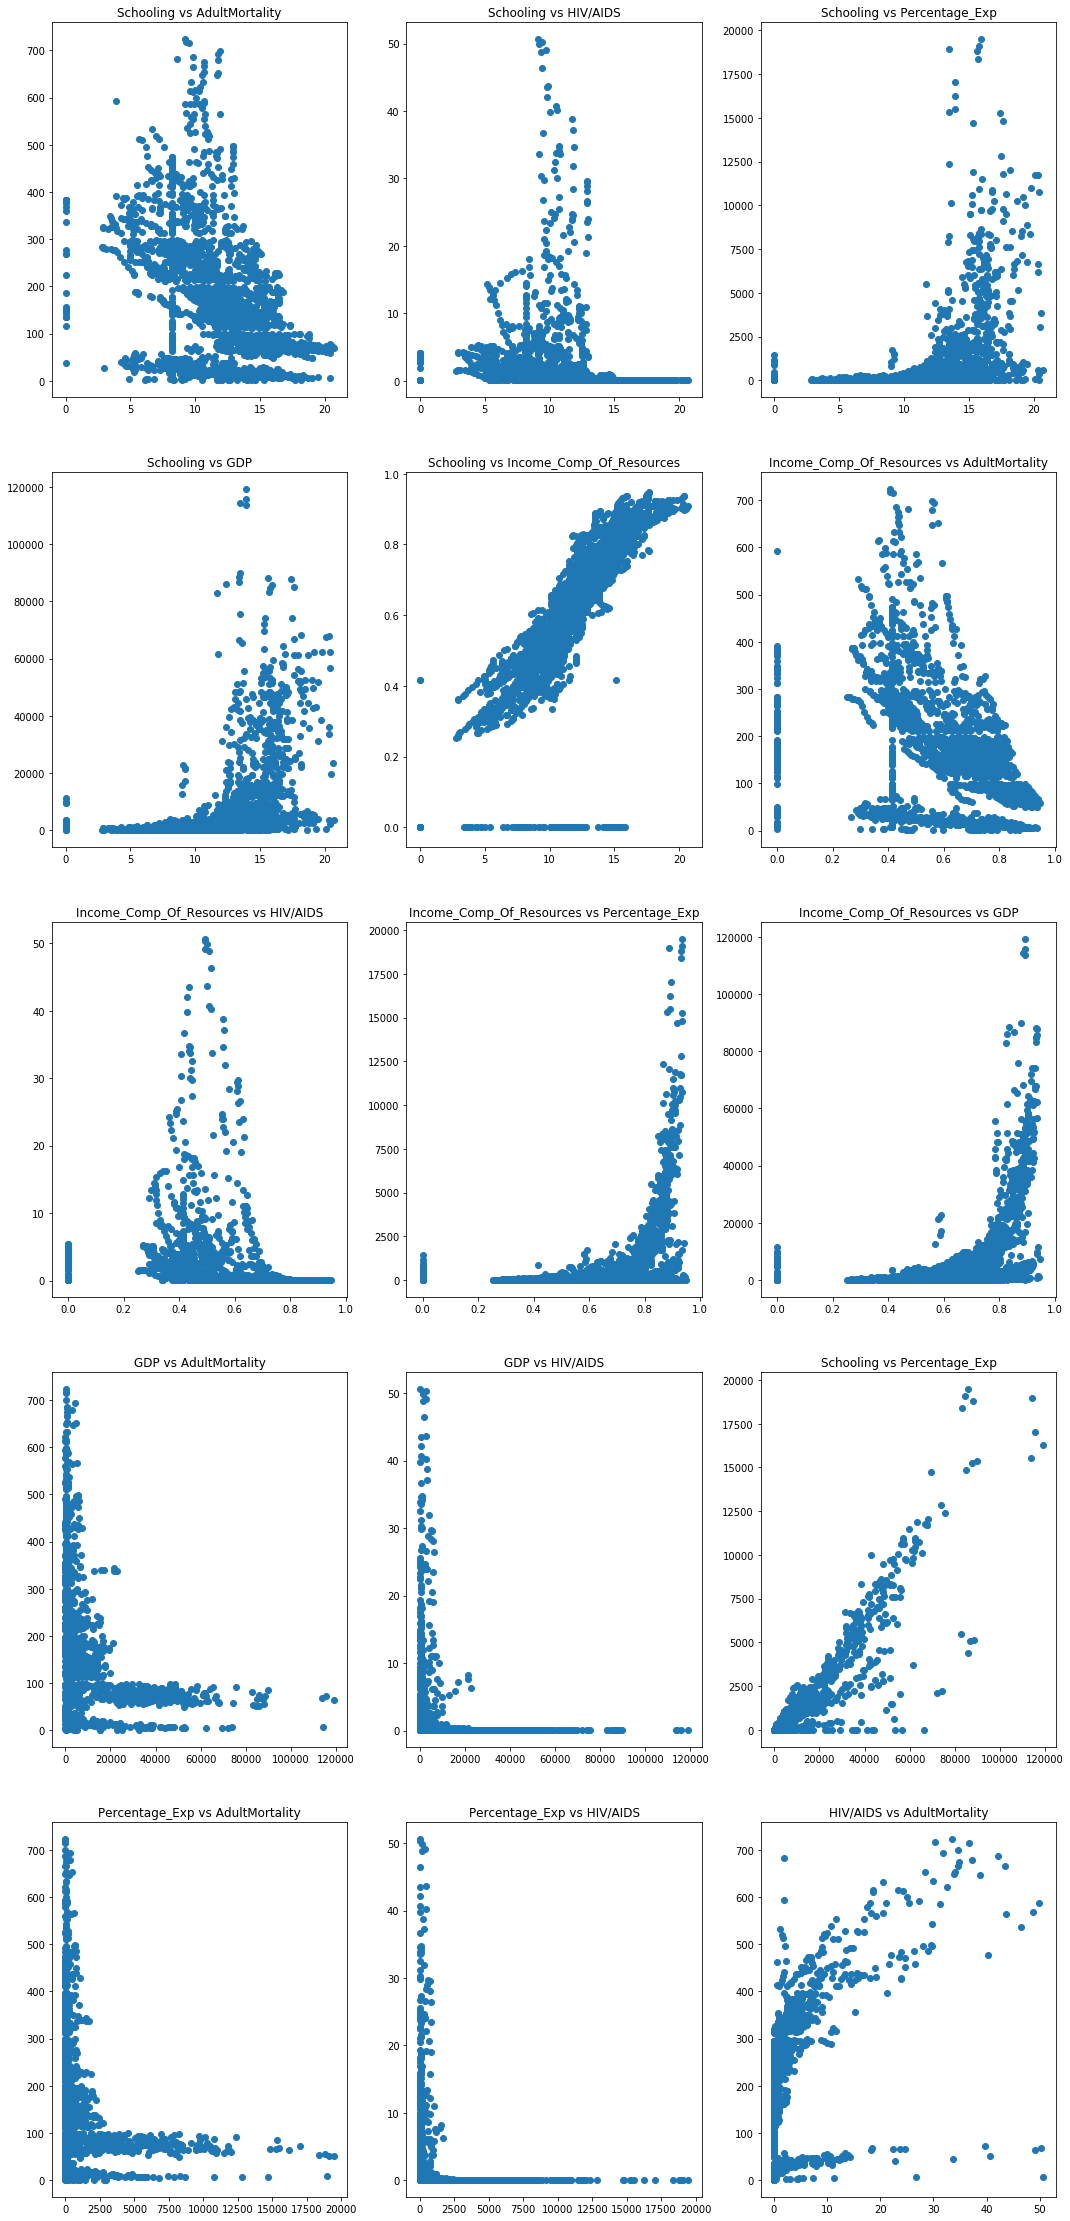

In [28]:
plt.figure(figsize=(18,40))

plt.subplot(5,3,1)
plt.scatter(life_data["Schooling"], life_data["Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(5,3,2)
plt.scatter(life_data["Schooling"], life_data["HIV/AIDS"])
plt.title("Schooling vs HIV/AIDS")

plt.subplot(5,3,3)
plt.scatter(life_data["Schooling"], life_data["Percentage_Exp"])
plt.title("Schooling vs Percentage_Exp")

plt.subplot(5,3,4)
plt.scatter(life_data["Schooling"], life_data["GDP"])
plt.title("Schooling vs GDP")

plt.subplot(5,3,5)
plt.scatter(life_data["Schooling"], life_data["Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(5,3,6)
plt.scatter(life_data["Income_Comp_Of_Resources"], life_data["Adult_Mortality"])
plt.title("Income_Comp_Of_Resources vs AdultMortality")

plt.subplot(5,3,7)
plt.scatter(life_data["Income_Comp_Of_Resources"], life_data["HIV/AIDS"])
plt.title("Income_Comp_Of_Resources vs HIV/AIDS")

plt.subplot(5,3,8)
plt.scatter(life_data["Income_Comp_Of_Resources"], life_data["Percentage_Exp"])
plt.title("Income_Comp_Of_Resources vs Percentage_Exp")

plt.subplot(5,3,9)
plt.scatter(life_data["Income_Comp_Of_Resources"], life_data["GDP"])
plt.title("Income_Comp_Of_Resources vs GDP")

plt.subplot(5,3,10)
plt.scatter(life_data["GDP"], life_data["Adult_Mortality"])
plt.title("GDP vs AdultMortality")

plt.subplot(5,3,11)
plt.scatter(life_data["GDP"], life_data["HIV/AIDS"])
plt.title("GDP vs HIV/AIDS")

plt.subplot(5,3,12)
plt.scatter(life_data["GDP"], life_data["Percentage_Exp"])
plt.title("Schooling vs Percentage_Exp")

plt.subplot(5,3,13)
plt.scatter(life_data["Percentage_Exp"], life_data["Adult_Mortality"])
plt.title("Percentage_Exp vs AdultMortality")

plt.subplot(5,3,14)
plt.scatter(life_data["Percentage_Exp"], life_data["HIV/AIDS"])
plt.title("Percentage_Exp vs HIV/AIDS")

plt.subplot(5,3,15)
plt.scatter(life_data["HIV/AIDS"], life_data["Adult_Mortality"])
plt.title("HIV/AIDS vs AdultMortality")

plt.show()

In [29]:
life_data_corr = life_data.iloc[:,:]
life_data_num = life_data.iloc[:,:]
cormat = life_data_num.corr()
cormat

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.018010,0.040657,-0.030528,-0.064377,-0.032983,-0.024057,-0.024593,...,0.009216,0.057618,-0.013398,0.090206,-0.038989,-0.015762,0.041252,0.052064,-0.044175,-0.046840
Year,0.001342,1.000000,0.001864,0.164554,-0.075371,-0.037415,-0.155781,0.031400,0.182478,-0.082493,...,0.100888,0.168512,0.139863,-0.139741,0.090686,0.014734,-0.043795,-0.047279,0.227183,0.195565
Status,-0.031635,0.001864,1.000000,-0.482676,0.316106,0.112252,-0.562158,-0.454261,-0.044041,0.076955,...,-0.222918,-0.274672,-0.219402,0.148590,-0.444365,0.040264,0.367429,0.367198,-0.427602,-0.455347
Life_Expectancy,-0.018010,0.164554,-0.482676,1.000000,-0.697240,-0.195075,0.372304,0.382124,0.238710,-0.156384,...,0.466427,0.197784,0.479706,-0.553916,0.429977,-0.021558,-0.485543,-0.480154,0.686130,0.706699
Adult_Mortality,0.040657,-0.075371,0.316106,-0.697240,1.000000,0.077919,-0.187863,-0.243394,-0.151727,0.030534,...,-0.278584,-0.099697,-0.278265,0.522176,-0.282525,-0.010972,0.316336,0.320855,-0.442175,-0.437362
Infant_Deaths,-0.030528,-0.037415,0.112252,-0.195075,0.077919,1.000000,-0.105479,-0.085612,-0.183863,0.501128,...,-0.168433,-0.125881,-0.173320,0.025231,-0.101404,0.549684,0.450986,0.459543,-0.147503,-0.194417
Alcohol,-0.064377,-0.155781,-0.562158,0.372304,-0.187863,-0.105479,1.000000,0.353509,0.038084,-0.042626,...,0.213648,0.204966,0.209819,-0.034509,0.302695,-0.026012,-0.406835,-0.397093,0.364723,0.440712
Percentage_Exp,-0.032983,0.031400,-0.454261,0.382124,-0.243394,-0.085612,0.353509,1.000000,-0.029464,-0.056596,...,0.149324,0.141271,0.145546,-0.097857,0.901868,-0.022760,-0.251818,-0.254134,0.390984,0.398214
HepatitisB,-0.024057,0.182478,-0.044041,0.238710,-0.151727,-0.183863,0.038084,-0.029464,1.000000,-0.109646,...,0.449330,0.041075,0.544834,-0.120402,0.028037,-0.095443,-0.118642,-0.121277,0.188415,0.200507
Measles,-0.024593,-0.082493,0.076955,-0.156384,0.030534,0.501128,-0.042626,-0.056596,-0.109646,1.000000,...,-0.133235,-0.106350,-0.139408,0.030899,-0.069292,0.236648,0.213993,0.212234,-0.131353,-0.139708


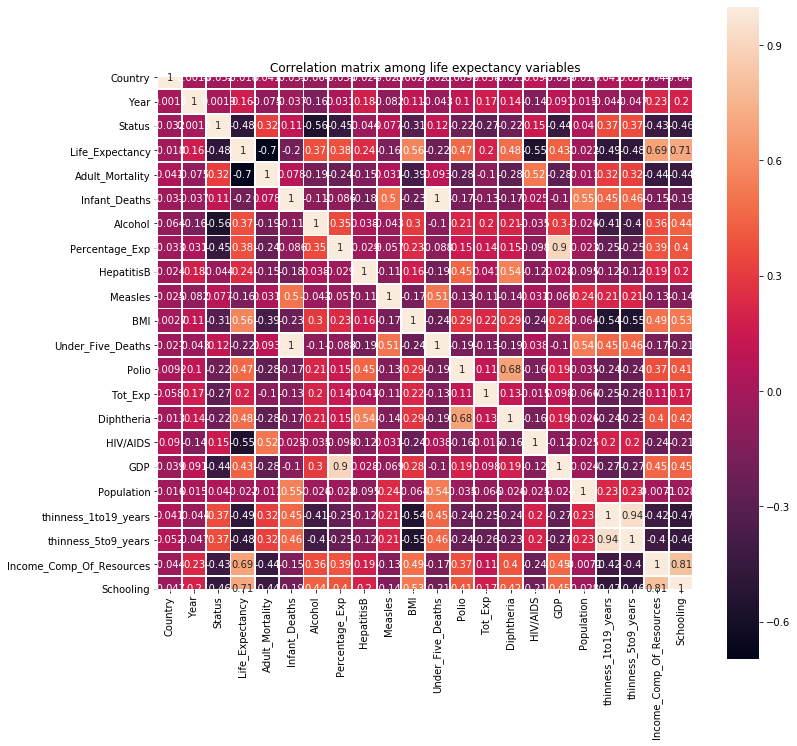

In [30]:
# Using heatmap to observe correlations.
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cormat, square=True, annot=True, linewidths=.9)
plt.title("Correlation matrix among life expectancy variables")

plt.show()


From Above correlation matrix, we can say that:

Percentage_Exp and GDP are correlated

Infant_Deaths and Under_Five_Deaths are correlated

thinness_1to19_years and thinness_5to9_years are  correlated

Income_comp_of_Resources and Schooling are correlated

In [31]:
round(life_data[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
0,79.20
1,67.07


We can say from this that developing countries has less life expectancy than developed countries

# Running regression models

## K Neighbors Regressor

In [32]:
life_data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [33]:
X = life_data.drop('Life_Expectancy',axis=1)
X

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [34]:
y = life_data['Life_Expectancy']
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0, 0.5, 'MSE')

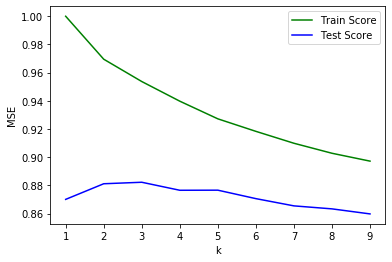

In [36]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

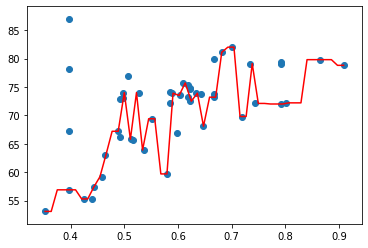

In [37]:
#Schooling and Life_Expectancy
X_b = X_train[:50,20].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear regression using the Normal Equation

In [38]:
X = life_data.drop('Life_Expectancy',axis=1)
y = life_data['Life_Expectancy']

In [39]:
X.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [40]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [42]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train score of linear regression is.{}".format(lreg.score(X_train, y_train)))
print("Test score of linear regression is.{}".format(lreg.score(X_test, y_test)))

Train score of linear regression is.0.8106607769864053
Test score of linear regression is.0.8247898897433361


Text(0.5, 0, 'Schooling')

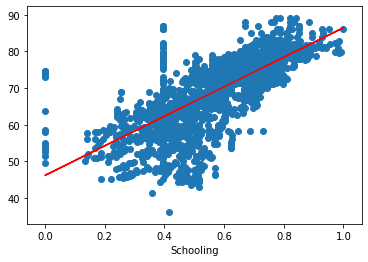

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,20].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Schooling')

## Polynomial regression

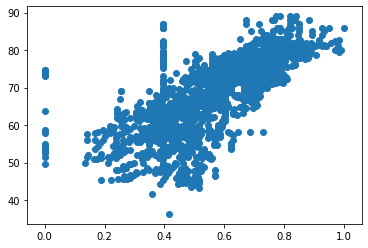

In [44]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,20].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [45]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [46]:
print("Train score of poly regression is.{}".format(train_score_list))
print("Test score of poly regression is.{}".format(test_score_list))

Train score of poly regression is.[0.8106607769864053, 0.9338927672237682]
Test score of poly regression is.[0.8247898897433363, 0.8619681284899015]


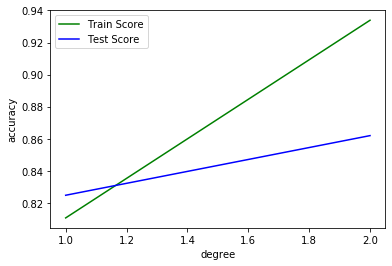

In [47]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

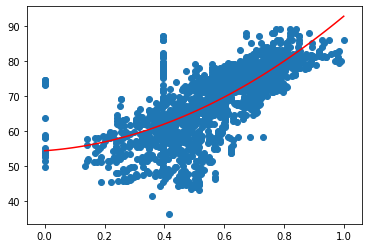

In [48]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,20].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

In [49]:
from  sklearn.linear_model import Ridge

x_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

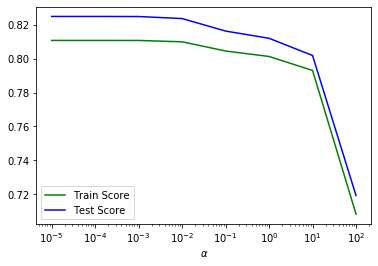

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

This suggests that the best α parameter is 0.001

In [51]:
print(train_score_list)
print(test_score_list)

[0.8106607754068825, 0.8106606201758932, 0.8106461726625522, 0.8098587554765317, 0.8044334626578427, 0.801217317727604, 0.7929827118455309, 0.7083950540547952]
[0.8247895935994554, 0.8247867570113294, 0.8247427668659537, 0.8235456461347517, 0.8161798164365364, 0.8119224319343592, 0.8017917079506702, 0.7193132731681692]


In [52]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score for ridge: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score for ridge: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score for ridge: 0.8106
Test score for ridge: 0.8247


In [53]:
ridge.coef_

array([ 1.22662233e+00, -9.79209211e-02, -1.76655236e+00, -1.44632173e+01,
        1.85209401e+02,  1.67172326e+00, -6.98162674e-01, -6.89897611e-01,
       -4.33760062e+00,  3.84567558e+00, -1.93014503e+02,  2.84742700e+00,
        2.50825197e+00,  3.21968808e+00, -2.36039017e+01,  5.71044255e+00,
        1.19549074e+00, -2.35579398e+00,  2.99844388e-01,  5.65093672e+00,
        1.04721996e+01])

In [54]:
ridge.intercept_

57.329702249815895

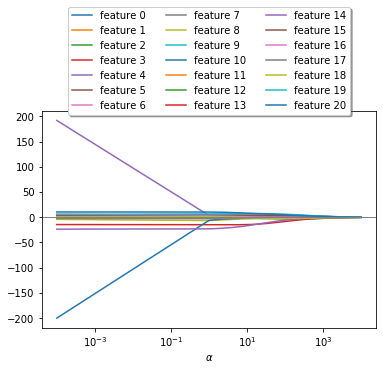

In [55]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.0001, 0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,21):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.0001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Simple SVR

In [56]:
X = life_data.drop('Life_Expectancy',axis=1)
y = life_data['Life_Expectancy']

In [57]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [58]:
linear_svc = SVR(C=1.0, kernel = 'linear', gamma = 0.1)
linear_svc.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
svc_pred = linear_svc.predict(X_test)
svc_pred

array([76.51543222, 66.29950774, 53.50693003, 69.52560976, 60.6508403 ,
       60.48211276, 71.30604379, 79.01816387, 71.24298184, 50.44127199,
       69.8736938 , 78.37282829, 72.67918886, 74.00276948, 58.70018794,
       72.74479355, 60.85769257, 66.43806601, 70.63490925, 79.68268917,
       69.8229993 , 75.38180351, 74.47549512, 80.61581791, 67.68294154,
       61.13855652, 82.13510003, 71.38774974, 70.71727386, 70.69329475,
       77.18369151, 60.72257874, 71.61354885, 77.52635152, 76.80385593,
       71.60794015, 73.71621586, 82.27685048, 63.30983357, 71.15812047,
       61.11938681, 74.19081768, 76.85184432, 73.90877078, 72.21403167,
       78.46708972, 59.66647901, 72.87098436, 55.39954868, 69.87354311,
       74.04923923, 65.09299372, 77.01845981, 69.7351428 , 65.43402691,
       70.9361926 , 80.39658027, 71.7552081 , 59.84583352, 71.30416184,
       69.18684552, 71.39004803, 69.41814856, 68.29347705, 59.81954123,
       73.97464768, 71.6581998 , 73.83206295, 67.07807313, 75.25

In [60]:
regressor=SVR(kernel='linear', degree=3,epsilon=1.0)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))
print((y_test,pred))

0.798138534342318
(867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
        ... 
2800    78.5
2852    69.9
2323    82.0
1775    54.0
2859    73.9
Name: Life_Expectancy, Length: 735, dtype: float64, array([76.7903938 , 66.37022037, 53.37582607, 69.35093156, 60.87196456,
       60.39994396, 71.56613385, 79.40130194, 71.28730426, 50.31697213,
       69.70316552, 78.73700752, 72.73810289, 74.14970556, 58.85909417,
       72.74416889, 61.1527843 , 66.71845016, 70.75549087, 80.00626633,
       69.69217658, 75.35786284, 74.41200685, 80.6651389 , 67.29290332,
       60.83571678, 82.27621309, 71.74676946, 70.77008045, 70.37929766,
       77.04117117, 59.88230439, 71.45569628, 77.48847143, 76.61709534,
       71.77563933, 74.11499308, 82.56373925, 63.55531343, 71.19078892,
       61.34374308, 74.30141206, 77.12051972, 74.06062461, 72.17096899,
       78.3642571 , 59.8215059 , 73.03910741, 55.28949642, 69.94606723,
       74.07734085, 64.70620016, 77.18104852, 69.9134429 , 65.8104

In [62]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [64]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [69]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [70]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [71]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

ValueError: Unknown label type: 'continuous'